# Image Classification - Imagenette
> This notebook demonstrates various techniques of effective Neural Network models training using the Callbacks mechanism of FastAI library (v1).

`Imagenette` dataset


## Getting the Data

In [0]:
from fastai.vision import *

In [0]:
path = untar_data('https://s3.amazonaws.com/fast-ai-imageclas/imagenette2') 

In [0]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)
def lbl_trfm(o): 
  return lbl_dict[str(o).split('/')[-2]]

In [0]:
tfms = get_transforms()

In [0]:
data = ImageList.from_folder(path).split_by_folder(valid='val').label_from_func(lbl_trfm).transform(tfms, size=320).databunch(bs=32).normalize(imagenet_stats)

In [7]:
data

ImageDataBunch;

Train: LabelList (9469 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
parachute,parachute,parachute,parachute,parachute
Path: /root/.fastai/data/imagenette2;

Valid: LabelList (3925 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
parachute,parachute,parachute,parachute,parachute
Path: /root/.fastai/data/imagenette2;

Test: None

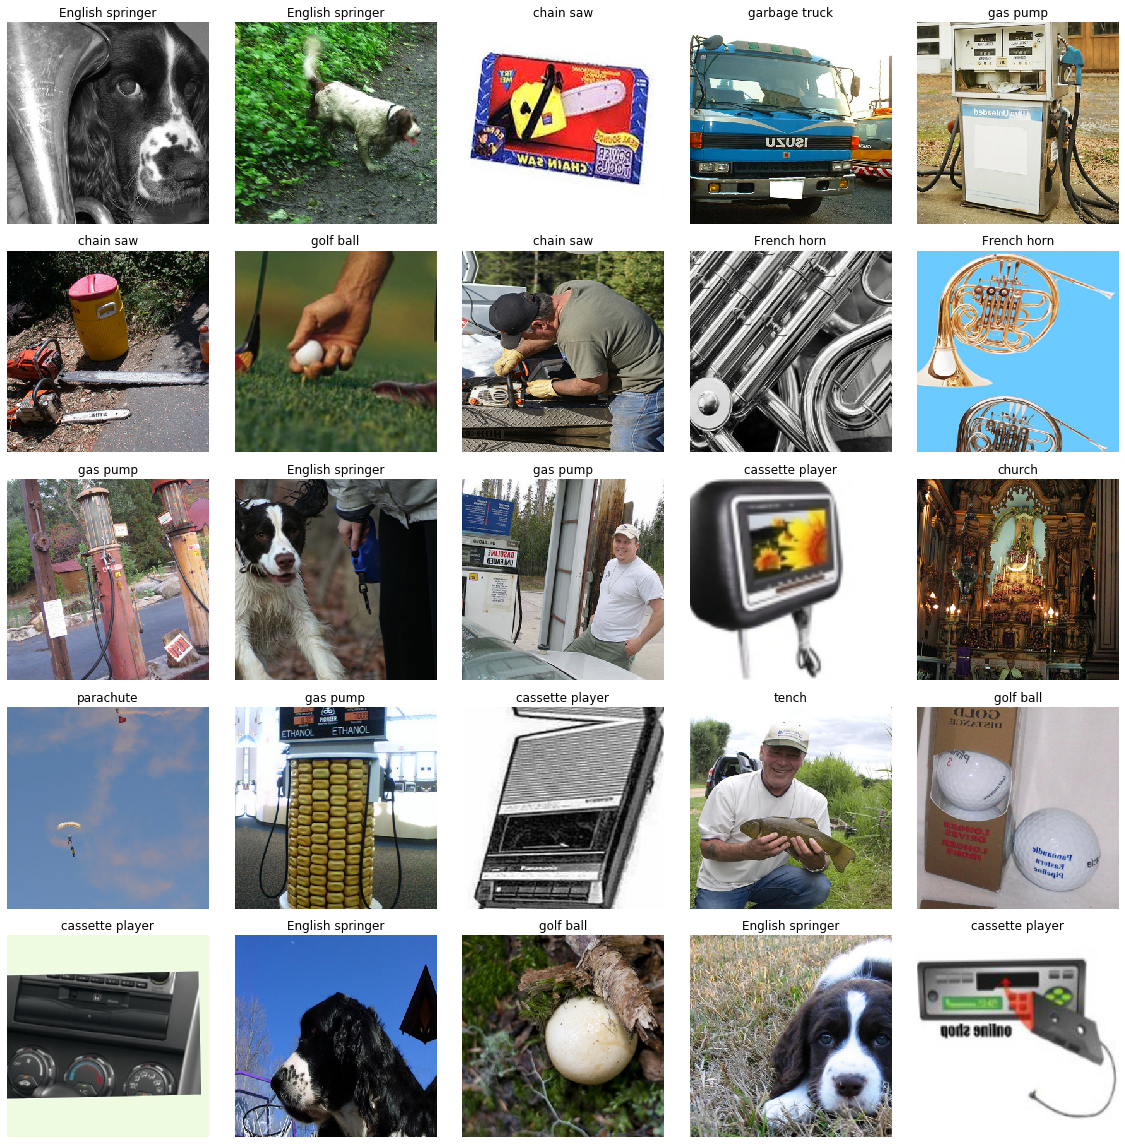

In [8]:
data.show_batch(5, figsize=(16,16))

## Training Model

In [0]:
if torch.cuda.is_available():
  torch.cuda.init()

In [0]:
from fastai.callbacks import *

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=[CSVLogger,ShowGraph])

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


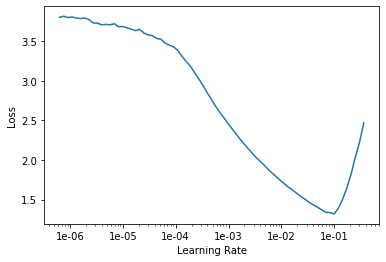

In [13]:
learn.recorder.plot()

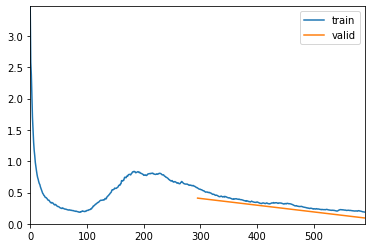

In [14]:
learn.freeze()
learn.fit_one_cycle(2,max_lr=1e-2)

In [0]:
learn.unfreeze()

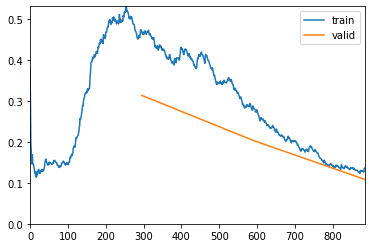

In [16]:
learn.fit_one_cycle(3,max_lr=slice(1e-4,1e-3,1e-2))

## Results

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

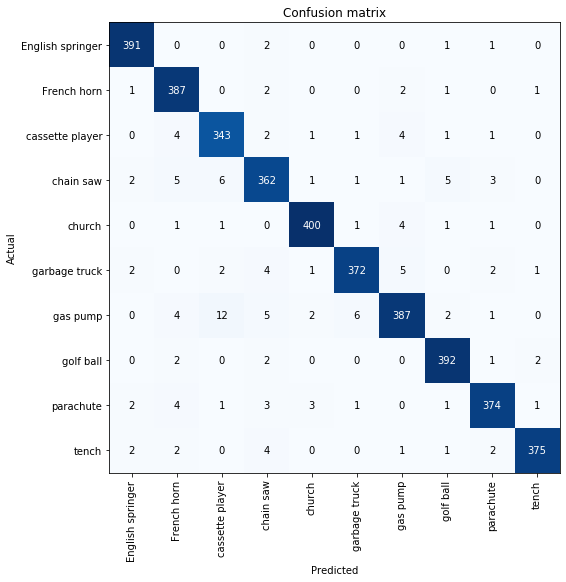

In [18]:
interp.plot_confusion_matrix(figsize=(8,8))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


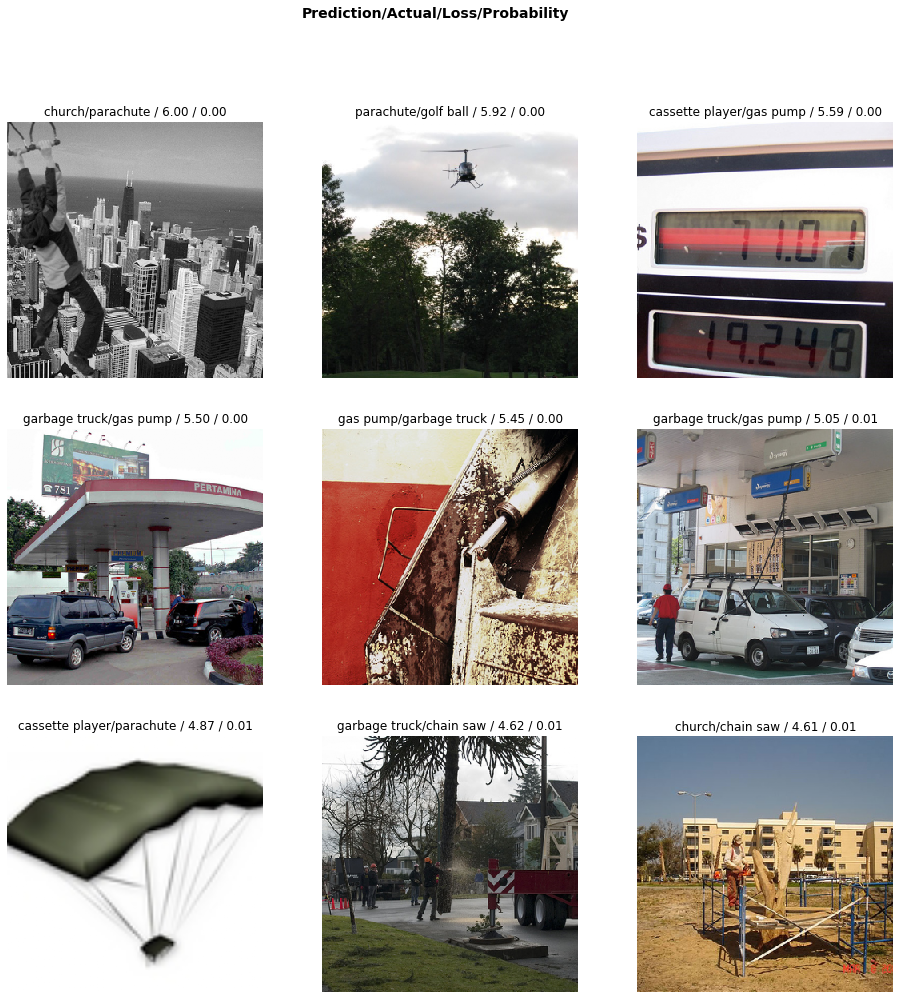

In [19]:
interp.plot_top_losses(9, figsize=(16,16))